# Thomas Tuchel Sacking Sentiment Analysis

### Step 1 - Import Modules and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import nltk

In [44]:
data = pd.read_csv('tuchelsacktwitterreaction3.csv')

data.head()

,Unnamed: 0,Date,User,Tweet
0,0,2022-09-09 23:50:25+00:00,_leget,"@TheRealEtinosa But most times, we would have ..."
1,1,2022-09-09 23:28:10+00:00,immanuel_achina,@Neymar_BarCFC_ @Olusholzz @Blue_Footy Don't m...
2,2,2022-09-09 23:24:57+00:00,Merachool,@itstelleofficia Were you expecting him to be ...
3,3,2022-09-09 23:24:01+00:00,AethernaDex,@HDahyor @TheGr1tz @CFCPys @Matt_Law_DT So if ...
4,4,2022-09-09 23:18:02+00:00,JJo19_,@Nino12x @CFCPys Oh yes you mean spend $300 mi...


In [45]:
data.shape

(15504, 4)

### Step 2 Data cleaning

In [46]:
from textblob import TextBlob
from wordcloud import WordCloud
import re

In [47]:
## lets select only the tweets column

df = data.drop(['User', 'Unnamed: 0'], axis= 1)

df.head()

,Date,Tweet
0,2022-09-09 23:50:25+00:00,"@TheRealEtinosa But most times, we would have ..."
1,2022-09-09 23:28:10+00:00,@Neymar_BarCFC_ @Olusholzz @Blue_Footy Don't m...
2,2022-09-09 23:24:57+00:00,@itstelleofficia Were you expecting him to be ...
3,2022-09-09 23:24:01+00:00,@HDahyor @TheGr1tz @CFCPys @Matt_Law_DT So if ...
4,2022-09-09 23:18:02+00:00,@Nino12x @CFCPys Oh yes you mean spend $300 mi...


In [48]:
df.isna().sum()

Date     0
Tweet    0
dtype: int64

In [49]:
## define a function for cleaning texts

def cleantweet(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #r indicates its a raw string, removes any mentions from the tewwts
    text = re.sub(r'#', '', text) #removes hastags from the tweets
    text = re.sub(r'RT[\s]+', '', text) #removes retweet abbreviation from tweets
    text = re.sub(r'https?://\S+', '', text) #removes any hyperlink
    text = re.sub(r'https', '', text)
    text = re.sub(r'&amp;', '', text) # removes amp notation
    text = re.sub(r'_[A-Za-z0-9]+', '', text) #removes username that starts with _
    return text
    

In [50]:
## lets clean the data now

df['Tweet'] = df['Tweet'].apply(cleantweet)

In [51]:
df.head()

,Date,Tweet
0,2022-09-09 23:50:25+00:00,"But most times, we would have started calling..."
1,2022-09-09 23:28:10+00:00,_ Don't mind this Vince or whatever his name...
2,2022-09-09 23:24:57+00:00,Were you expecting him to be sacked on his fi...
3,2022-09-09 23:24:01+00:00,"So if top 4 was the aim, why sack Tuchel?"
4,2022-09-09 23:18:02+00:00,Oh yes you mean spend $300 million during th...


### Step 3: Get Subjectivity and Polarity

In [52]:

#subjectivity function
def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity


#ploarity funtion
def getpolarity(text):
    return TextBlob(text).sentiment.polarity  

In [53]:
## lets apply this 2 functions and store in new column

df['Subjectivity'] = df['Tweet'].apply(getsubjectivity)
df['Polarity'] = df['Tweet'].apply(getpolarity)

In [54]:
df.head()

,Date,Tweet,Subjectivity,Polarity
0,2022-09-09 23:50:25+00:00,"But most times, we would have started calling...",0.625000,0.000000
1,2022-09-09 23:28:10+00:00,_ Don't mind this Vince or whatever his name...,0.511905,0.095238
2,2022-09-09 23:24:57+00:00,Were you expecting him to be sacked on his fi...,0.333333,0.312500
3,2022-09-09 23:24:01+00:00,"So if top 4 was the aim, why sack Tuchel?",0.500000,0.500000
4,2022-09-09 23:18:02+00:00,Oh yes you mean spend $300 million during th...,0.295833,-0.037500


### Step 4: Plot wordcloud to visualize the distribution of the words

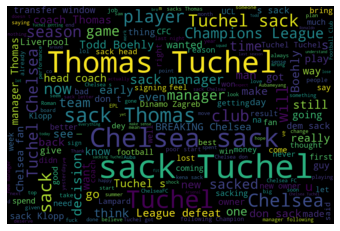

In [55]:
allwords = ' '.join([twts for twts in df['Tweet']])

wordcloud = WordCloud(width= 1200, height= 800, random_state= 21, max_font_size= 120).generate(allwords)

#show plot
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

### Step 5: get the positive neutral and negative analysis

In [56]:
## get analysis funtion

def getanalysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

In [57]:
## apply the function on polarity

df['Analysis'] = df['Polarity'].apply(getanalysis)

In [58]:
df

,Date,Tweet,Subjectivity,Polarity,Analysis
0,2022-09-09 23:50:25+00:00,"But most times, we would have started calling...",0.625000,0.000000,Neutral
1,2022-09-09 23:28:10+00:00,_ Don't mind this Vince or whatever his name...,0.511905,0.095238,Positive
2,2022-09-09 23:24:57+00:00,Were you expecting him to be sacked on his fi...,0.333333,0.312500,Positive
3,2022-09-09 23:24:01+00:00,"So if top 4 was the aim, why sack Tuchel?",0.500000,0.500000,Positive
4,2022-09-09 23:18:02+00:00,Oh yes you mean spend $300 million during th...,0.295833,-0.037500,Negative
...,...,...,...,...,...
15499,2022-09-07 00:13:14+00:00,"Pls sack Tuchel, his tactics doent suits the ...",0.386058,-0.025481,Negative
15500,2022-09-07 00:10:35+00:00,Please sack Tuchel or send him to see Pep for...,0.250000,0.250000,Positive
15501,2022-09-07 00:08:39+00:00,Sack tuchel already,0.000000,0.000000,Neutral
15502,2022-09-07 00:06:47+00:00,Sack tuchel is the only reason,1.000000,0.000000,Neutral


### Step 6: Lets checkout the positive and negative tweets

In [59]:
## get all positive tweets

n = 1

positivedf = df.sort_values(by= ['Polarity'])
for i in range (0, positivedf.shape[0]):
    if (positivedf['Analysis'][i] == 'Positive'):
        print(str(n) + ' ) ' + positivedf['Tweet'][i])
        print()
        n = n+1

1 ) _   Don't mind this Vince or whatever his name is. PRing for English agenda. Only time will tell whether this sack was will yield the needed results. Before I forget, we're being told even if we miss T4 no wahalla but if Tuchel missed, his head on the gallows right?

2 )  Were you expecting him to be sacked on his first season?! This was what I fear if fans continue to "mourn" the tuchel sack

3 )     So if top 4 was the aim, why sack Tuchel?

4 )  Is it the right decision to sack Tuchel? Yes
Was the timing right? No
That’s my only issue. If you don’t trust him then sack him before you give him 300m not after

5 ) I still can't get over Tuchel sack😢

Feels like Mou 2008

2021 was one of my best years, Tommy Tuchel was a big part of it

6 )  The club comes first bro....that's all I can say quit acting like ur d only guy hurt by tuchel's sack

7 ) National team boss claims Tuchel sack is 'positive' for struggling Chelsea star 

8 )     Well if there was so much patience lying around 

In [60]:
## get all negative  tweets

n = 1

negativedf = df.sort_values(by= ['Polarity'], ascending= False)
for i in range (0, negativedf.shape[0]):
    if (negativedf['Analysis'][i] == 'Negative'):
        print(str(n) + ' ) ' + positivedf['Tweet'][i])
        print()
        n = n+1

1 )   Oh yes you mean spend $300 million during the summer for players that Tuchel wanted and then sack him 5 or 6 games later? They made life easier for him, they really did.

2 ) we didn’t even sack tuchel because of his results so talking about standards is irrelevant

3 )  Tuchel has shown that in the past that he could turn bad situations around, remember he just bought in new guys so why the rush to sack him then

4 )  Feels weird, still can’t get over Tuchel’s sack. It’s been tough for me in the last 2 days

5 )  Loved his project with the youngsters, eventually he turned out terrible and deserved the sack, like Tuchel

6 )  Under Tuchel, backend of last season was horrific bad results, back performance no style of play no improvement on any player and unhappiness. That has continued this season. The new owners made a decision to sack him in my opinion is the correct call.

7 )    They had a lot of reason to sack tuchel not only he had bad start of the szn

8 )  Our football has

### Step 7: Plot a scatterplot of polarity and subjectivity

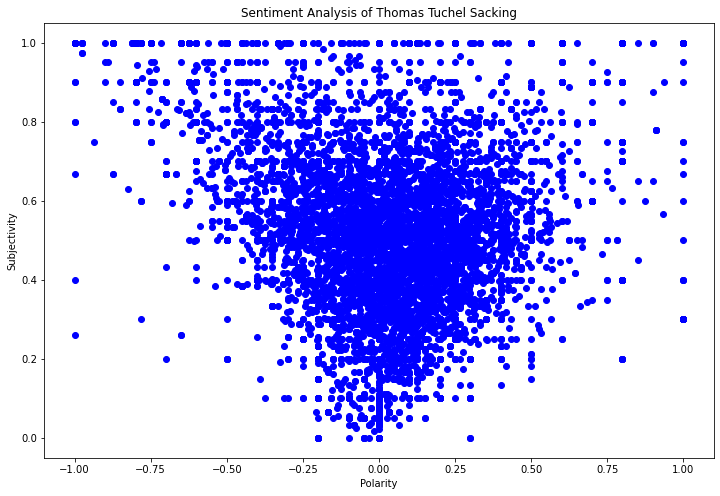

In [19]:
x = df["Polarity"]
y = df['Subjectivity']

plt.figure(figsize=(12, 8))

plt.scatter(x=x, y=y, color= 'Blue')
plt.ylabel('Subjectivity')
plt.xlabel('Polarity')
plt.title("Sentiment Analysis of Thomas Tuchel Sacking")

plt.show()

### Step 8: Get percentage of positive and negative tweets

In [61]:
positivetweets = df[df['Analysis'] == 'Positive']

positivetweets = positivetweets['Tweet']

#get percentage

round((positivetweets.shape[0] / df.shape[0]) * 100, 1)

32.4

In [62]:
# percentage of negative tweets

negativetweets = df[df['Analysis'] == 'Negative']

negativetweets = negativetweets['Tweet']

#get percentage

round((negativetweets.shape[0] / df.shape[0] * 100), 1)

24.5

In [63]:
# percentage of neutral

neutraltweets = df[df['Analysis'] == 'Neutral']

neutraltweets = neutraltweets['Tweet']

#get percentage

round((neutraltweets.shape[0] / df.shape[0]) * 100, 1)

43.1

In [64]:
## lets visualize this in bar plot

df['Analysis'].value_counts()

Neutral     6679
Positive    5021
Negative    3804
Name: Analysis, dtype: int64

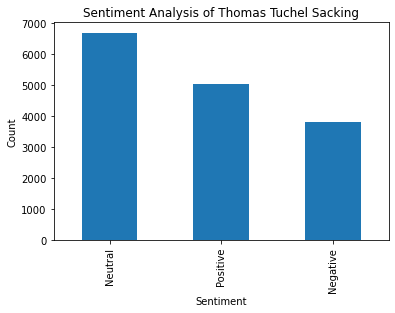

In [65]:
df['Analysis'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('Sentiment')
plt.title("Sentiment Analysis of Thomas Tuchel Sacking")

plt.show()

In [73]:
# export data for dashboard visualization

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15504 entries, 0 to 15503
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          15504 non-null  object 
 1   Tweet         15504 non-null  object 
 2   Subjectivity  15504 non-null  float64
 3   Polarity      15504 non-null  float64
 4   Analysis      15504 non-null  object 
dtypes: float64(2), object(3)
memory usage: 605.8+ KB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d %H:%M:%S.%f').dt.strftime('%m-%d-%Y %H:%M:%S.%f')

In [71]:
df.head()

,Date,Tweet,Subjectivity,Polarity,Analysis
0,09-09-2022,"But most times, we would have started calling...",0.625000,0.000000,Neutral
1,09-09-2022,_ Don't mind this Vince or whatever his name...,0.511905,0.095238,Positive
2,09-09-2022,Were you expecting him to be sacked on his fi...,0.333333,0.312500,Positive
3,09-09-2022,"So if top 4 was the aim, why sack Tuchel?",0.500000,0.500000,Positive
4,09-09-2022,Oh yes you mean spend $300 million during th...,0.295833,-0.037500,Negative


In [77]:

df.to_csv('cleanedsentimentdata.csv', index=False)